In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv("final_3.csv")

In [3]:
dataset = dataset.replace([np.inf,-np.inf], np.nan)
dataset = dataset.dropna()

X = dataset
y = X[['Hindex_Growth_10years']]
X = dataset.drop(['Hindex_Growth_10years'], axis = 1)
#y = X[['total_citations_in_9_predicted']]
#y = X[['hindex_in_9_predicted']]

#X= X.drop(['hindex_in_9_predicted'], axis = 1)
print(X.head())
#X = X.iloc[:,3:22]
#X = X.drop(['total_citations_in_9_predicted'],axis = 1)
X1 = X
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 1)

   author_hindex  author_hindex_delta  author_citation_count  \
0              3                    1                     31   
1              6                    1                    125   
2              5                    1                     89   
3             29                    2                   3214   
4              3                    1                     21   

   author_citations_delta_1  author_citations_delta_0  \
0                         2                         6   
1                        21                        21   
2                        15                        16   
3                       360                       329   
4                         2                         7   

   author_mean_citations_per_paper  author_mean_citation_per_paper_delta  \
0                         0.720930                              0.082041   
1                         6.578947                              1.391447   
2                         5.933333          

C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, mutual_info_regression

from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()
#scaled_X = scaler.fit_transform(X[X.columns[X.columns!= 'Hindex_Growth_10years' ]])
#scaled_X = pd.DataFrame(X, columns = X.columns[X.columns!= 'Hindex_Growth_10years'])

scaled_X = scaler.fit_transform(X_train)
scaled_X = pd.DataFrame(scaled_X, columns = X.columns)

In [6]:
from sklearn.feature_selection import f_regression

C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


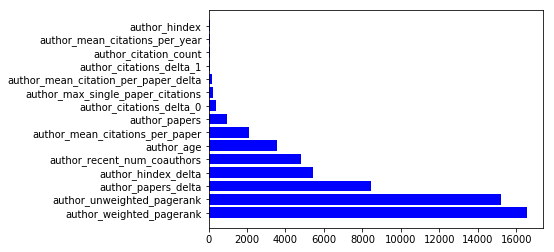

In [12]:
select = SelectKBest(f_regression, k= 15)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]
colnames_selected
selected_features.scores_
indices = np.argsort(selected_features.scores_)[::-1]

features = []
for i in range(15):
    features.append(X_train.columns[indices[i]])

# plot important variables
plt.figure()
plt.barh(features, selected_features.scores_[indices[range(15)]], color='b', align='center')
plt.show()

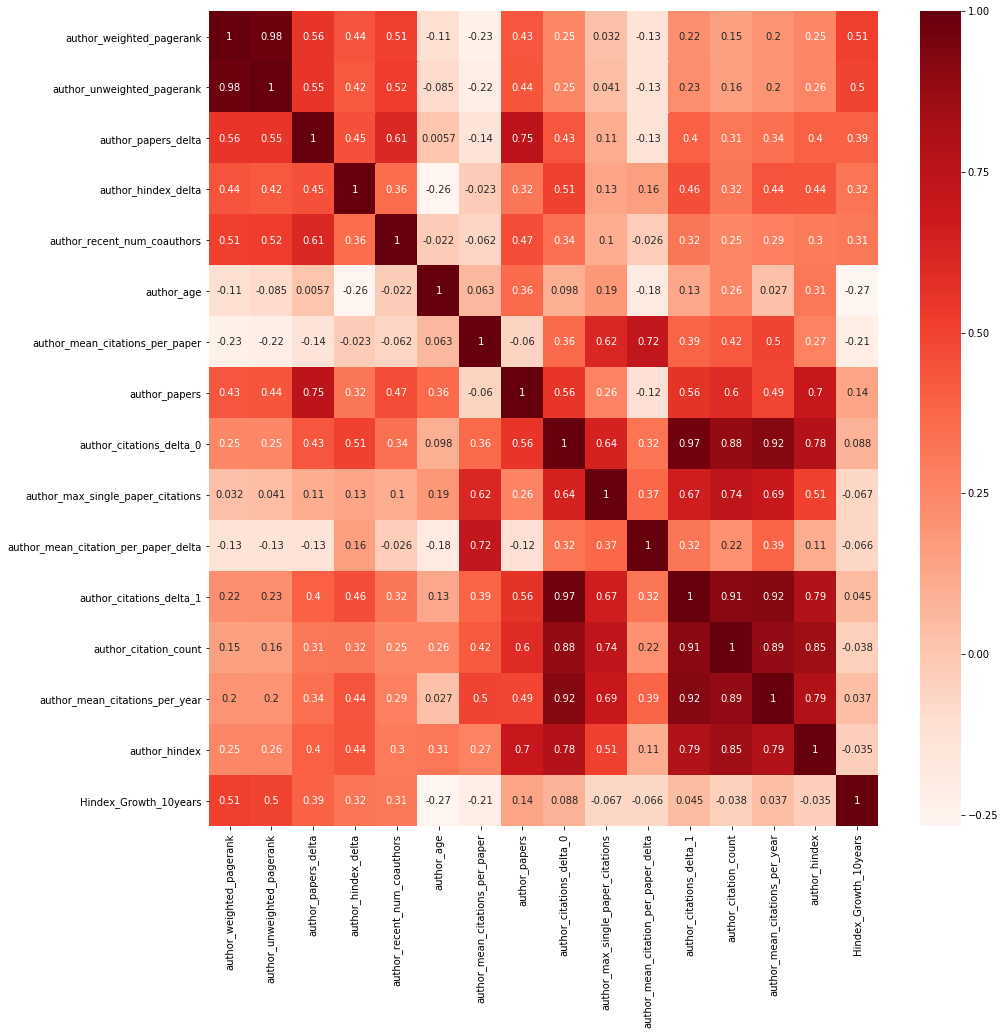

In [13]:
#plot heatmap to measure correlation
XY_train = pd.concat([X_train[features], y_train], axis = 1)

plt.figure(figsize=(15,15))
cor = (XY_train).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [58]:
X_train.head()

,author_hindex,author_hindex_delta,author_citation_count,author_citations_delta_1,author_citations_delta_0,author_mean_citations_per_paper,author_mean_citation_per_paper_delta,author_mean_citations_per_year,author_papers,author_papers_delta,author_unweighted_pagerank,author_weighted_pagerank,author_age,author_recent_num_coauthors,author_max_single_paper_citations,Delta_30_index
408,3,2,28,12,10,2.153846,0.953846,5.600000,13,8,0.872111,0.923758,5,10,16,3
6778,5,0,72,7,8,7.200000,-0.942857,6.545455,10,3,0.737421,0.529095,11,5,22,5
47882,3,1,23,2,6,3.285714,1.142857,1.769231,7,0,0.237671,0.235076,13,1,9,3
39201,4,1,62,13,11,5.636364,2.181818,4.769231,11,0,0.151821,0.121465,13,2,24,4
41973,4,1,47,7,7,3.615385,-0.051282,5.875000,13,4,0.238831,0.228973,8,2,22,4


In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
reg = LinearRegression().fit(X_train_selected, y_train)
reg.score(X_train_selected, y_train)
print(reg.coef_)
print(reg.intercept_)
y_pred_reg = pd.DataFrame(reg.predict(X_test_selected))
rmse = np.sqrt(np.sum((reg.predict(X_test_selected)-y_test)**2)/len(y_test))
print(rmse)
r2_score(y_test, y_pred_reg)

[[-2.92611074e-03  3.34540988e-03  1.94636668e-05 -1.94270030e-04
   1.24489450e-04 -4.10246746e-04  4.57763645e-04  8.35150794e-05
  -1.66609021e-04  1.29988726e-03  5.73562026e-04  3.28649075e-02
  -4.38740166e-04 -2.39718240e-07  4.42431787e-06]]
[0.03567606]
Hindex_Growth_10years    0.027326
dtype: float64


0.3774427256465641

In [19]:
from sklearn.linear_model import Ridge
reg1 = Ridge(alpha= 0.5)
reg1.fit(X_train_selected, y_train)
y_pred_reg1 = reg1.predict(X_test_selected)
reg1.score(X_train_selected, y_train)
print(reg1.coef_)
print(reg1.intercept_)
y_pred_reg1 = pd.DataFrame(reg1.predict(X_test_selected))
rmse = np.sqrt(np.sum((y_pred_reg1-y_test)**2)/len(y_test))
print(rmse)
r2_score(y_test, y_pred_reg1)

[[-2.92623621e-03  3.34617502e-03  1.94649361e-05 -1.94278648e-04
   1.24483736e-04 -4.10305276e-04  4.57819140e-04  8.35383922e-05
  -1.66607336e-04  1.29998122e-03  6.36250310e-04  3.27996482e-02
  -4.38793005e-04 -2.58076810e-07  4.42592473e-06]]
[0.03567844]
0                        0.0
Hindex_Growth_10years    0.0
dtype: float64


0.3774385042144116

In [18]:
from sklearn.linear_model import Lasso
reg2 = Lasso(alpha= 0.5)
reg2.fit(X_train_selected, y_train)
y_pred_reg2 = reg2.predict(X_test_selected)
reg2.score(X_train_selected, y_train)
print(reg2.coef_)
print(reg2.intercept_)
y_pred_reg2 = pd.DataFrame(reg2.predict(X_test_selected))
rmse = np.sqrt(np.sum((y_pred_reg2-y_test)**2)/len(y_test))
print(rmse)
r2_score(y_test, y_pred_reg2)

[-0.  0. -0.  0.  0. -0. -0.  0.  0.  0.  0.  0. -0.  0. -0.]
[0.04135387]
0                        0.0
Hindex_Growth_10years    0.0
dtype: float64


-9.076441800148771e-05

In [22]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=15, random_state=0)
regressor.fit(X_train_selected, y_train)
y_pred = regressor.predict(X_test_selected)
regressor.score(X_train_selected, y_train)

C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9020434333190861

In [63]:
from sklearn import metrics
#y_pred = model.predict(X_test_selected)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.019718639355137416
Mean Squared Error: 0.0006987636943735898
Root Mean Squared Error: 0.026434138805219092


In [23]:
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential

C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [24]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 15))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

In [25]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [26]:
model.fit(X_train_selected, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
46088/46088 [==============================] - 5s 102us/step - loss: 12.3952
Epoch 2/10
46088/46088 [==============================] - 4s 88us/step - loss: 0.9809
Epoch 3/10
46088/46088 [==============================] - 4s 85us/step - loss: 0.0211
Epoch 4/10
46088/46088 [==============================] - 4s 86us/step - loss: 0.0096
Epoch 5/10
46088/46088 [==============================] - 4s 85us/step - loss: 0.0012
Epoch 6/10
46088/46088 [==============================] - 4s 86us/step - loss: 9.8333e-04
Epoch 7/10
46088/46088 [==============================] - 4s 87us/step - loss: 9.7708e-04
Epoch 8/10
46088/46088 [==============================] - 4s 87us/step - loss: 8.7687e-04
Epoch 9/10
46088/46088 [==============================] - 4s 87us/step - loss: 8.5054e-04
Epoch 10/10
46088/46088 [==============================] - 4s 88us/step - loss: 9.5821e-04


In [27]:
from sklearn import metrics
y_pred = model.predict(X_test_selected)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0205500582067497
Mean Squared Error: 0.0007584739398392814
Root Mean Squared Error: 0.0275404055859619


In [28]:
#print(r2_score(y_test, y_pred))
r2_score(y_test, y_pred)

0.3676284599863209

RMSE value for k=  1 is: 0.03648684166584157
RMSE value for k=  2 is: 0.031851044437328425
RMSE value for k=  3 is: 0.03003831709571433
RMSE value for k=  4 is: 0.029107325181394927
RMSE value for k=  5 is: 0.028481173666135517
RMSE value for k=  6 is: 0.02811116195710813
RMSE value for k=  7 is: 0.027891950094987055
RMSE value for k=  8 is: 0.02775646073417833
RMSE value for k=  9 is: 0.02758160631695349
RMSE value for k=  10 is: 0.02745160402854273
RMSE value for k=  11 is: 0.027359221437429505
RMSE value for k=  12 is: 0.02725341723507768
RMSE value for k=  13 is: 0.027190811834805793
RMSE value for k=  14 is: 0.027101375576214868
RMSE value for k=  15 is: 0.027058084475282875
RMSE value for k=  16 is: 0.027010311313824805
RMSE value for k=  17 is: 0.026970673220121248
RMSE value for k=  18 is: 0.02692871100239491
RMSE value for k=  19 is: 0.02691299970361454
RMSE value for k=  20 is: 0.026895330713434154
0                        0.0
Hindex_Growth_10years    0.0
dtype: float64
0.380

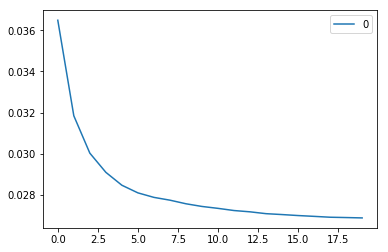

In [29]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
#matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_selected, y_train)  #fit the model
    pred=model.predict(X_test_selected) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()


reg3 = neighbors.KNeighborsRegressor(n_neighbors = 12)
reg3.fit(X_train_selected, y_train)
y_pred_reg3 = reg3.predict(X_test_selected)
reg3.score(X_train_selected, y_train)

y_pred_reg3 = pd.DataFrame(reg3.predict(X_test_selected))
rmse = np.sqrt(np.sum((y_pred_reg3-y_test)**2)/len(y_test))
rmse
print(rmse)
print(r2_score(y_test, y_pred_reg3))
r2_score(y_test, y_pred_reg3)
both3 = y_test.reset_index()
both3['Pred'] = y_pred_reg3